# US Census Data

this data is taken from US Cesusn showcasing information based on each US State. the columns of information is listed below

## Data Inspection

information is presented as below:
- total population of the state
- percentage of different races in the population
- average income
- male and female population of the respective state

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob

files = glob.glob("states*.csv")

df_list = []
for filename in files:
    data = pd.read_csv(filename)
    df_list.append(data)

df = pd.concat(df_list)

print(df.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific       Income            GenderPop  
0  3.25%   0.04%  $59,125.27       510388M_543273F  
1  1.25%   0.05%  $46,296.81     2322409M_2455167F  
2  1.02%   0.04%  $51,805.41       423477M_419713F  
3  1.41%   0.04%  $47,328.08     3167756M_3331859F  
4  3.67%   0.07%  $55,874.52   13171316M_13367298F  


# Data Tidying

date is cleaned by removing signs and changing the data types to appropriate types

In [10]:
print (df.dtypes)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


# Tidying Functions

- the percenatge sign in all races column are removed
- the dollar sign is removed from income and the columns are changed to numerical values
- the gender population is divided into two columns of male and female populations
- the F and M is removed from female and male populations

In [11]:
#store the columns with percentage sign in a list
percentage_columns = ['Hispanic' , 'White' , 'Black' , 'Native' , 'Asian' , 'Pacific']
percentage_columns_df = df[percentage_columns]

#iterate through the columns and remove the percebtage sign and change the data type of the column to float
for column_name in percentage_columns_df:
    df[column_name] = df[column_name].replace('[\%,]', '', regex=True)
    df[column_name] = pd.to_numeric(df[column_name])


#the same process for the income column with the dollar sign
df["Income"] = df["Income"].replace('[\$,]', '', regex=True)
df['Income'] = pd.to_numeric(df['Income'])


#the gender pop colum contains both female and male population in on string
#first the string is halved and stored in female and male population columns
name_split = df.GenderPop.str.split("_")
df['male_population'] = name_split.str.get(0)
df['female_population'] = name_split.str.get(1)


#the M and F at the end of the strings are removed and replaced with empty chartacter and columns are 
#converted to numeric type afterwards
df['male_population'] = df['male_population'].replace('[^0-9]', "", regex=True)
df['female_population'] = df['female_population'].replace('[^0-9]', "", regex=True)
df['male_population'] = pd.to_numeric(df['male_population']).astype('Int64')
df['female_population'] = pd.to_numeric(df['female_population']).astype('Int64')


#finally the genderpop colum is dropped from the dataframe
df.drop(columns='GenderPop', inplace=False)


print (df.head())
print (df.dtypes)

   Unnamed: 0           State  TotalPop  Hispanic  White  Black  Native  \
0           0    Rhode Island   1053661     13.36  74.33   5.68    0.35   
1           1  South Carolina   4777576      5.06  62.89  28.75    0.29   
2           2    South Dakota    843190      3.24  82.50   1.42    9.42   
3           3       Tennessee   6499615      4.72  73.49  18.28    0.23   
4           4           Texas  26538614     38.05  44.69  11.65    0.26   

   Asian  Pacific    Income            GenderPop  male_population  \
0   3.25     0.04  59125.27      510388M_543273F           510388   
1   1.25     0.05  46296.81    2322409M_2455167F          2322409   
2   1.02     0.04  51805.41      423477M_419713F           423477   
3   1.41     0.04  47328.08    3167756M_3331859F          3167756   
4   3.67     0.07  55874.52  13171316M_13367298F         13171316   

   female_population  
0             543273  
1            2455167  
2             419713  
3            3331859  
4           1336729

- The gender population column is removed

In [12]:
# the first colummn is dropped and State is considered as the index
df = df.drop('GenderPop', axis=1, errors='ignore')
if 'States' in df.columns:
    df = df.set_index('States')
print (df.head())

   Unnamed: 0           State  TotalPop  Hispanic  White  Black  Native  \
0           0    Rhode Island   1053661     13.36  74.33   5.68    0.35   
1           1  South Carolina   4777576      5.06  62.89  28.75    0.29   
2           2    South Dakota    843190      3.24  82.50   1.42    9.42   
3           3       Tennessee   6499615      4.72  73.49  18.28    0.23   
4           4           Texas  26538614     38.05  44.69  11.65    0.26   

   Asian  Pacific    Income  male_population  female_population  
0   3.25     0.04  59125.27           510388             543273  
1   1.25     0.05  46296.81          2322409            2455167  
2   1.02     0.04  51805.41           423477             419713  
3   1.41     0.04  47328.08          3167756            3331859  
4   3.67     0.07  55874.52         13171316           13367298  


### Female Population ~ Average Income
### Male Population ~ Average Income

the average income is plotted agaisnt female and male population


   Unnamed: 0           State  TotalPop  Hispanic  White  Black  Native  \
0           0    Rhode Island   1053661     13.36  74.33   5.68    0.35   
1           1  South Carolina   4777576      5.06  62.89  28.75    0.29   
2           2    South Dakota    843190      3.24  82.50   1.42    9.42   
3           3       Tennessee   6499615      4.72  73.49  18.28    0.23   
4           4           Texas  26538614     38.05  44.69  11.65    0.26   

   Asian  Pacific    Income  male_population  female_population  
0   3.25     0.04  59125.27           510388             543273  
1   1.25     0.05  46296.81          2322409            2455167  
2   1.02     0.04  51805.41           423477             419713  
3   1.41     0.04  47328.08          3167756            3331859  
4   3.67     0.07  55874.52         13171316           13367298  


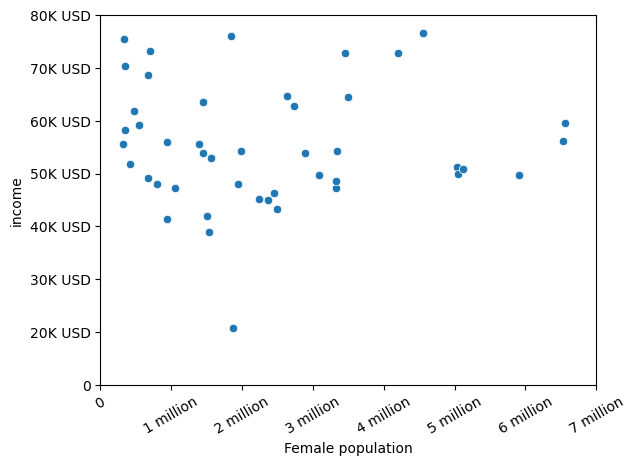

<Figure size 640x480 with 0 Axes>

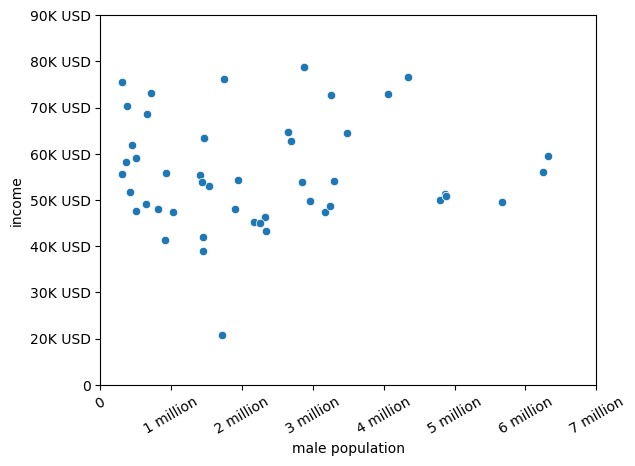

<Figure size 640x480 with 0 Axes>

In [14]:
print (df.head())


#df = df.reset_index()


female = df.female_population[df.female_population <= 0.75*(10**7)]

fig ,ax = plt.subplots()

sns.scatterplot(x=female , y='Income' , data=df)

default_xticks = ax.get_xticks()
ax.set_xticks(default_xticks)
ax.set_xticklabels(['0', '1 million', '2 million', '3 million', '4 million', '5 million', '6 million' , '7 million'] , rotation=30)

default_yticks = ax.get_yticks()
ax.set_yticks(default_yticks)
ax.set_yticklabels(['0', '20K USD', '30K USD', '40K USD', '50K USD', '60K USD', '70K USD' , '80K USD'])

# Set axis labels
ax.set_xlabel('Female population')
ax.set_ylabel('income')


plt.show()
plt.clf()


male = df.male_population[df.male_population <= 0.75*(10**7)]

fig ,ax = plt.subplots()

sns.scatterplot(x=male , y='Income' , data=df)

default_xticks = ax.get_xticks()


ax.set_xticks(default_xticks)
ax.set_xticklabels(['0', '1 million', '2 million', '3 million', '4 million', '5 million', '6 million' , '7 million'] , rotation=30)

default_yticks = ax.get_yticks()
ax.set_yticks(default_yticks)
ax.set_yticklabels(['0', '20K USD', '30K USD', '40K USD', '50K USD', '60K USD', '70K USD', '80K USD', '90K USD'])

# Set axis labels
ax.set_xlabel('male population')
ax.set_ylabel('income')


plt.show()
plt.clf()


# nan values

- nan values are checked and filled accordingly based on total populations

In [15]:
df['female_population'] = df['female_population'].fillna(df['TotalPop'] - df['male_population'] )
print (df.isna().sum())

index                0
Unnamed: 0           0
State                0
TotalPop             0
Hispanic             0
White                0
Black                0
Native               0
Asian                0
Pacific              5
Income               0
male_population      0
female_population    0
dtype: int64


## Histogram of Races

- percentage of each races are plotted in each individual state

            State  TotalPop    Income Ethnicity  Percentage
0    Rhode Island   1053661  59125.27  Hispanic       13.36
1  South Carolina   4777576  46296.81  Hispanic        5.06
2    South Dakota    843190  51805.41  Hispanic        3.24
3       Tennessee   6499615  47328.08  Hispanic        4.72
4           Texas  26538614  55874.52  Hispanic       38.05


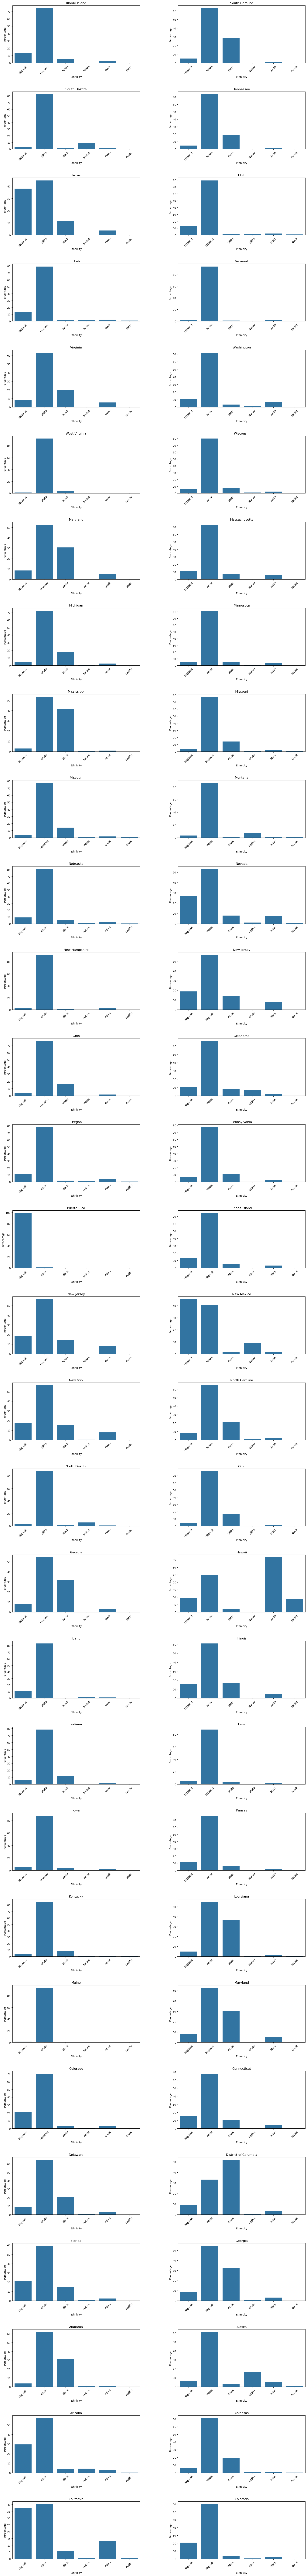

In [28]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, message="FixedFormatter should only be used together with FixedLocator")


df = df.drop_duplicates()
df_melted = pd.melt(df, id_vars=['State', 'TotalPop', 'Income'], 
                    value_vars=['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
                    var_name='Ethnicity', value_name='Percentage')

print (df_melted.head())

num_states = df['State'].nunique()

# Create subplots
fig, axes = plt.subplots(num_states, 2, figsize=(20, 300))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each state's bar plot in the corresponding subplot
for i, state in enumerate(df['State']):
    current_state = df_melted[df_melted['State'] == state]
    sns.barplot(ax=axes[i], x=current_state['Ethnicity'], y=current_state['Percentage'])
    axes[i].set_title(state)
    axes[i].set_xticklabels(current_state['Ethnicity'], rotation=45)

#Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Races ~ State
- percentage of population of each race in all states are plotted

              State  TotalPop    Income Ethnicity  Percentage
0      Rhode Island   1053661  59125.27  Hispanic       13.36
1    South Carolina   4777576  46296.81  Hispanic        5.06
2      South Dakota    843190  51805.41  Hispanic        3.24
3         Tennessee   6499615  47328.08  Hispanic        4.72
4             Texas  26538614  55874.52  Hispanic       38.05
..              ...       ...       ...       ...         ...
301         Alabama   4830620  43296.36   Pacific        0.03
302          Alaska    733375  70354.74   Pacific        1.06
303         Arizona   6641928  54207.82   Pacific        0.17
304        Arkansas   2958208  41935.63   Pacific        0.15
305      California  38421464  67264.78   Pacific        0.35

[306 rows x 5 columns]


/var/folders/m9/02syqrp93zg6fyn_7w05v0gh0000gn/T/ipykernel_41794/4110646061.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(current_ethnicity_sorted['State'], rotation=90)
/var/folders/m9/02syqrp93zg6fyn_7w05v0gh0000gn/T/ipykernel_41794/4110646061.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(current_ethnicity_sorted['State'], rotation=90)
/var/folders/m9/02syqrp93zg6fyn_7w05v0gh0000gn/T/ipykernel_41794/4110646061.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(current_ethnicity_sorted['State'], rotation=90)
/var/folders/m9/02syqrp93zg6fyn_7w05v0gh0000gn/T/ipykernel_41794/4110646061.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(current_ethnicity_sorted['State'], rotation=90)
/var/folders/m9/02syqrp93zg6fyn_7w05v0gh0000gn/T/ipykernel_41794/4110646

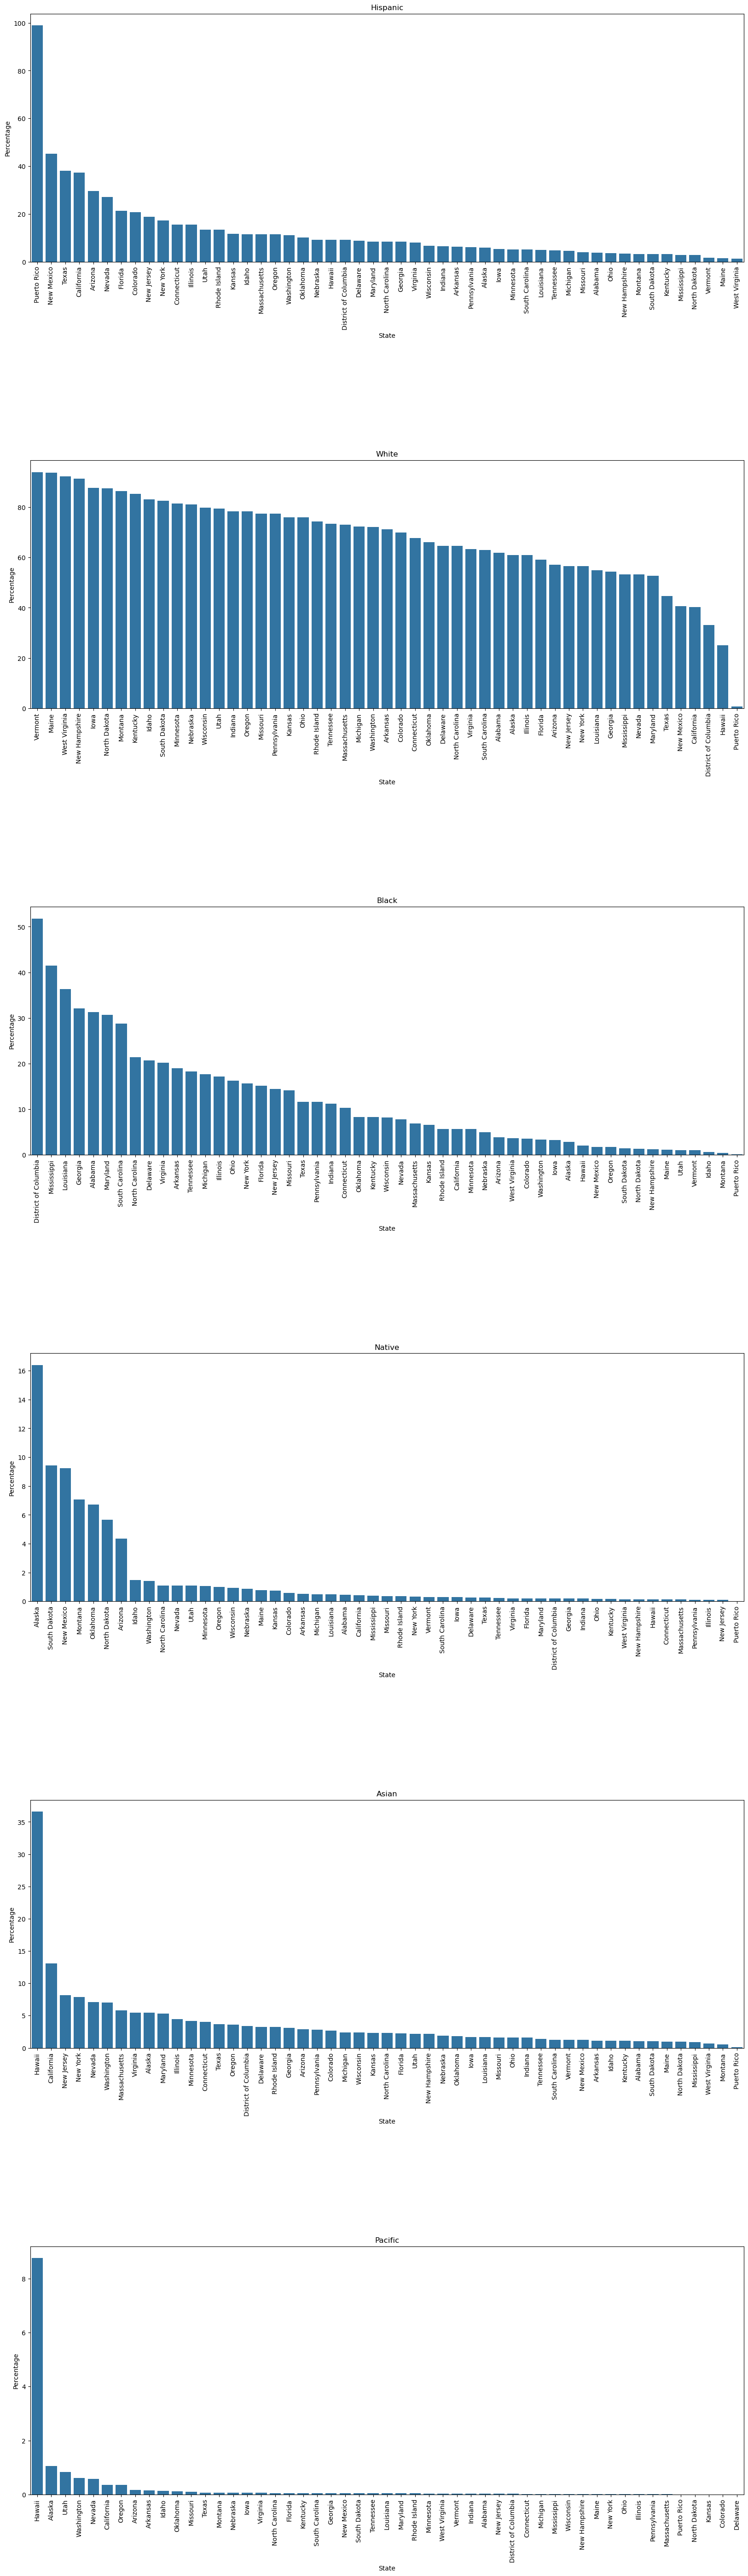

In [ ]:

print (df_melted)

fig, axes = plt.subplots(6, 1, figsize=(20, 70))

plt.subplots_adjust(hspace=0.8)

# Flatten the axes array for easy iteration
axes = axes.flatten()
ethnicity_list = list(df_melted['Ethnicity'].unique())

for i in range(len(ethnicity_list)):
    current_ethnicity = df_melted[df_melted['Ethnicity'] == ethnicity_list[i]]
    current_ethnicity_sorted = current_ethnicity.sort_values(by='Percentage', ascending=False)
    sns.barplot(ax=axes[i], x=current_ethnicity_sorted['State'], y=current_ethnicity_sorted['Percentage'])
    axes[i].set_title(ethnicity_list[i])
    axes[i].set_xticklabels(current_ethnicity_sorted['State'], rotation=90)


# average income ~ state

the average income of all US states are plotted

   level_0  index           State  TotalPop  Hispanic  White  Black  Native  \
0        0      0    Rhode Island   1053661     13.36  74.33   5.68    0.35   
1        1      1  South Carolina   4777576      5.06  62.89  28.75    0.29   
2        2      2    South Dakota    843190      3.24  82.50   1.42    9.42   
3        3      3       Tennessee   6499615      4.72  73.49  18.28    0.23   
4        4      4           Texas  26538614     38.05  44.69  11.65    0.26   

   Asian  Pacific    Income            GenderPop  male_population  \
0   3.25     0.04  59125.27      510388M_543273F           510388   
1   1.25     0.05  46296.81    2322409M_2455167F          2322409   
2   1.02     0.04  51805.41      423477M_419713F           423477   
3   1.41     0.04  47328.08    3167756M_3331859F          3167756   
4   3.67     0.07  55874.52  13171316M_13367298F         13171316   

   female_population  
0             543273  
1            2455167  
2             419713  
3            33318

/var/folders/m9/02syqrp93zg6fyn_7w05v0gh0000gn/T/ipykernel_41794/1670246602.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(df['State'], rotation=90)


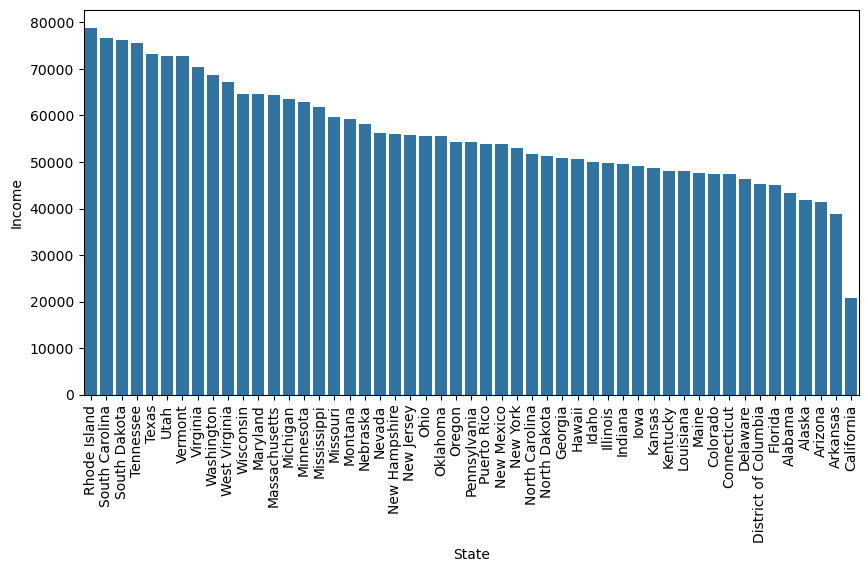

In [ ]:
print (df.head())

df_sorted = df.sort_values(by='Income', ascending=False)


fig, axes = plt.subplots(figsize=(10,5))

sns.barplot(data=df_sorted, x = df_sorted['State'] , y = df_sorted['Income'])

axes.set_xticklabels(df['State'], rotation=90)

# Flatten the axes array for easy iteration
#axes = axes.flatten()

print (df.Income[df_melted['State'] == 'North Carolina'])

# Plot each state's bar plot in the corresponding subplot
# for i, state in enumerate(df['State']):
#     current_state = df_melted[df_melted['State'] == state]
#     sns.barplot(ax=axes[i], x=current_state['Ethnicity'] , y=current_state['Income'])
#     print (current_state['Income'])
#     print (state)
#     axes[i].set_title(state)
#     axes[i].set_xticklabels(current_state['Ethnicity'], rotation=45)

# #Hide any remaining empty subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# male - female population

male and female population in all states are plotted

/var/folders/m9/02syqrp93zg6fyn_7w05v0gh0000gn/T/ipykernel_41794/2226189034.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(df_melted_gender['State'], rotation=90)


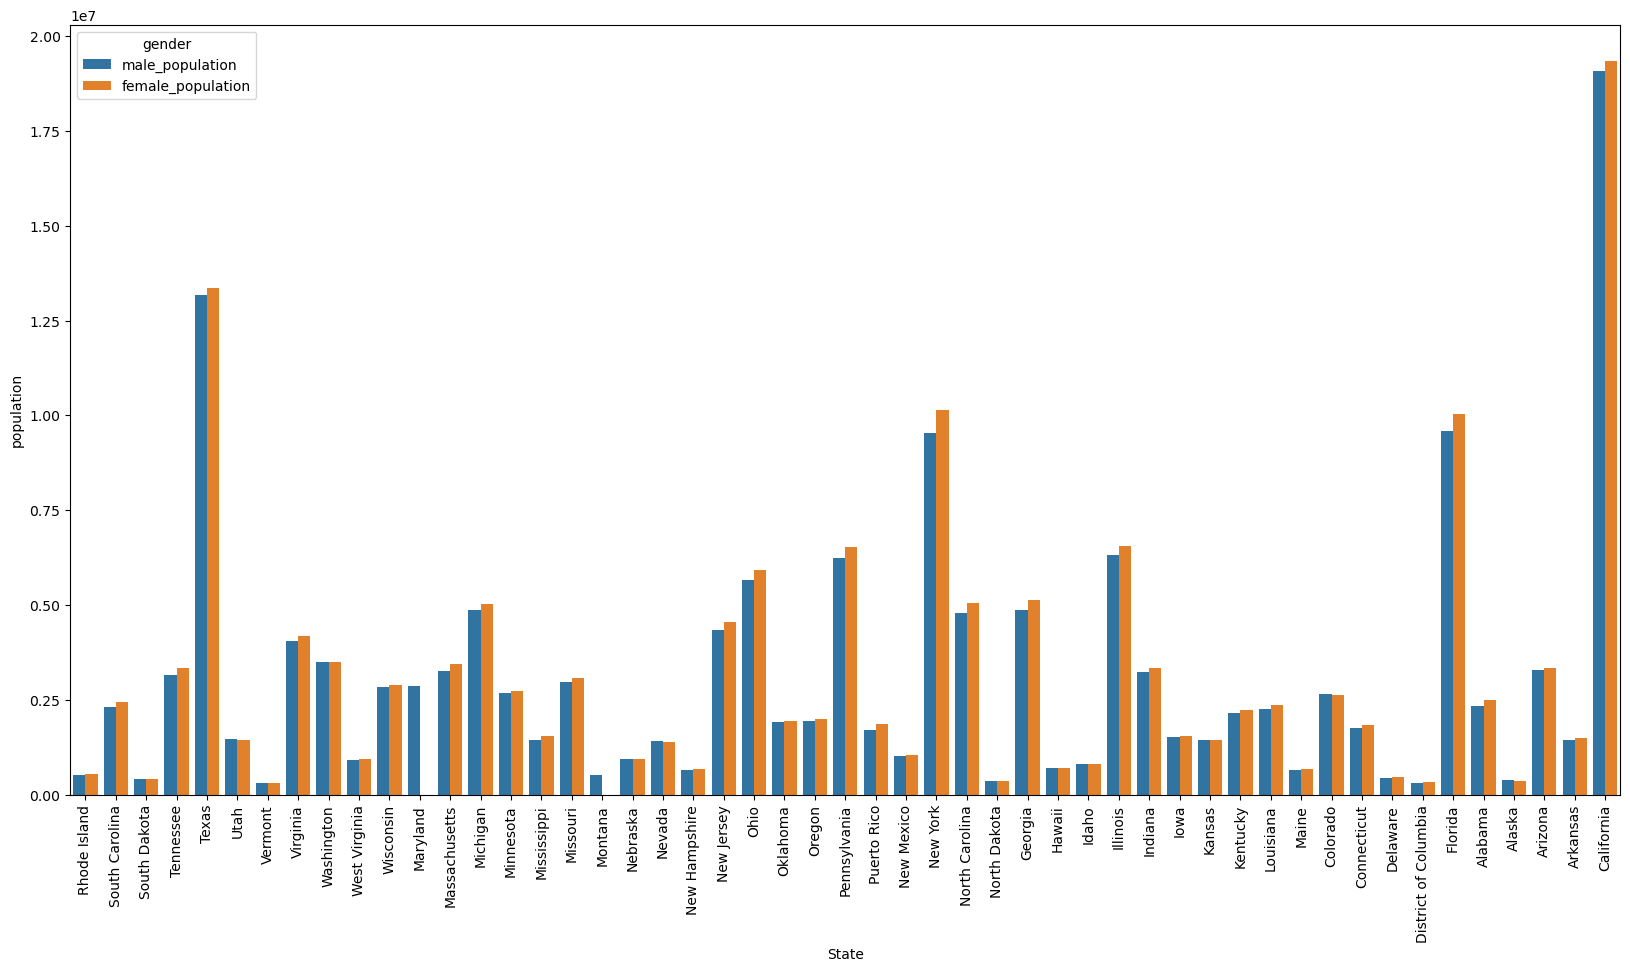

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(figsize=(20, 10))

df_melted_gender = pd.melt(df, id_vars=['State', 'TotalPop'], 
                    value_vars=['male_population' , 'female_population'],
                    var_name='gender', value_name='population')

sns.barplot(x = "State" , y = "population" , hue = "gender" , data= df_melted_gender)
axes.set_xticklabels(df_melted_gender['State'], rotation=90)

plt.show()
plt.clf()
